# Recovering the homology of immersed manifolds: demo

Raphaël Tinarrage https://raphaeltinarrage.github.io/
<br/>
Nov 2020

This page describes the implementation and use of the method described in our paper *Recovering the homology of immersed manifolds* https://arxiv.org/abs/1912.03033.

## Background

The method described in this notebook has been designed to answer the following estimation problem: given a sample of the image of an immersed manifold, estimate the homology groups of the abstract initial manifold.

Let $\mathbb{R}^n$ be the Euclidean space, and $M(\mathbb{R}^n)$ the space of $n \times n$ matrices.
Consider a finite subset $X$ of $\mathbb{R}^n$. 

We suppose that $X$ is a sample of an immersed manifold $\mathcal{M} \subset \mathbb{R}^n$.
That is, there exists an abstract manifold $\mathcal{M}_0$ and an immersion $u\colon \mathcal{M}_0 \rightarrow \mathbb{R}^n$ whose image is $\mathcal{M}$.
We aim at estimating the homology of $\mathcal{M}$, from the mere observation of $X$.

The method consists in computing the **lifted set** $\check X$, which is a finite subspace of $\mathbb{R}^n \times M(\mathbb{R}^n)$, and in applying DTM-based filtrations in the ambient space $\mathbb{R}^n \times M(\mathbb{R}^n)$. The DTM-filtrations are defined in https://arxiv.org/abs/1811.04757.
This method depends on three parameters: $r \in (0, +\infty)$, $\gamma \in [0, +\infty)$ and $m \in [0,1]$.

First, consider the set $\check X$, defined as
$$\check X = \{ (x, \gamma \overline \Sigma(x)), x \in X  \},$$
where $\overline \Sigma(x)$, the **normalized covariance matrix** at $x$, is computed with respect to a radius $r$.

Then, compute the **DTM-filtration** on $\check X$ with parameter $m$. It is denoted $W[\check X, m]$, and is defined as the collection of subsets $(W^t[X,m,p])_{t \geq 0}$ of $\mathbb{R}^n \times M(\mathbb{R}^n)$, with
$$W^t[X,m,p] = \bigcup_{x \in X} \overline{\mathcal{B}}\big(x,t - \mathrm{d}_{\mu,m}(x)\big),$$
where $\mathrm{d}_{\mu,m}$ is the DTM of the empirical probability measure on $\check X$ with parameter $m$, and $\overline{\mathcal{B}}(x,r)$ denotes the closed ball of center $x$ and radius $r$ if $r \geq 0$, or the emptyset if $r < 0$.


The corresponding persistent module of $i^\text{th}$ homology is obtained by applying the $i^\text{th}$ homology functor to $W[\check X,m]$. Throughout this notebook, we will compute homology over the finite field $\mathbb{Z}/2\mathbb{Z}$.

## Datasets

We consider here two datasets:
-  Bernouilli's lemniscate
-  the Olympic rings

## Package

The functions are contained in the `Velour` package (https://pypi.org/project/velour/).
<br/>
It is based on the `Gudhi` library (https://gudhi.inria.fr/python/latest/).

In [1]:
import velour

## First dataset: lemniscate

We start with a sample $X$ of the lemniscate $\mathcal{M} \subset \mathbb{R}^2$. 
It is to be seen as an immersion of the circle $\mathbb{S}_1 \rightarrow \mathbb{R}^2$.

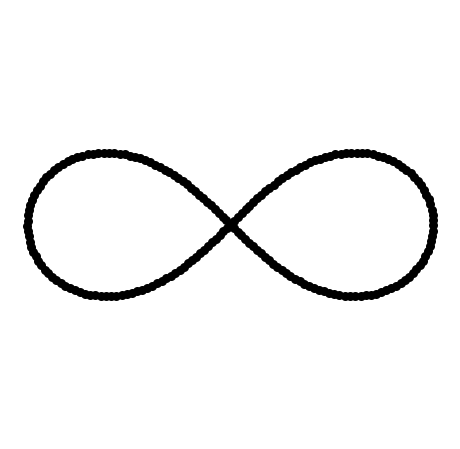

In [2]:
N_observation = 200                                         #number of points sampled on the lemniscate
N_anomalous = 0                                             #number of outliers 
X = velour.SampleOnLemniscate(N_observation, N_anomalous)   #samples points 

velour.PlotPointCloud(X)                                    #plots the point cloud

Consider the Rips filtration of $X$.
Its $H_0$-barcode is represented in red, and $H_1$ in green.

Rips Complex is of dimension 2 - 1333500 simplices - 200 vertices. Filtration maximal value is 1.


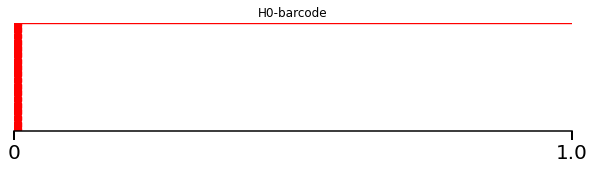

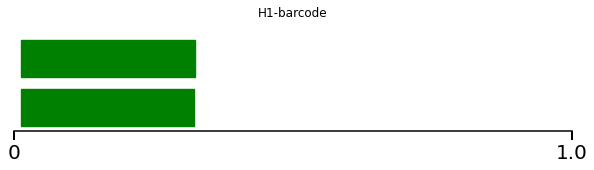

In [3]:
filtration_max = 1
st = velour.RipsComplex(X, filtration_max = filtration_max, dimension_max = 2) #creates a Rips complex     

velour.PlotPersistenceBarcodes(st, tmax = filtration_max)                      #computes the persistence

On these diagrams, one can read the homology of the lemniscate. Its Betti numbers are $(\beta_0, \beta_1) = (1,2)$.

We now illustrate our method. We aim to recover the homology of the original circle $\mathbb{S}_1$.
First, we compute the lifted set $\check X$, with given parameters $r$ and $\gamma$. 

In [4]:
r = 0.05
gamma = 3
X_check = velour.Lifting(X, r, gamma)   #builds the lifted set

We then compute the persistence diagram of the DTM-filtration on $\check X$ with parameter $m = 0.03$.

Weighted Rips Complex is of dimension 2 - 1333500 simplices - 200 vertices. Filtration maximal value is inf.


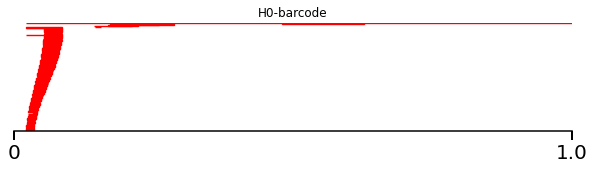

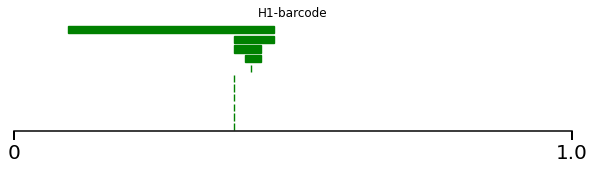

In [5]:
m = 0.01
p = 1                                            
dimension_max = 2
st = velour.DTMFiltration(X_check, m, p, dimension_max)   #creates a DTM-filtration

velour.PlotPersistenceBarcodes(st)                        #displays the persistence barcode

On these diagrams, there is an interval where one reads the homology of the original manifold $\mathbb{S}_1$: $(\beta_0, \beta_1) = (1,1)$.
We successfully recovered the homology of the original manifold.

As illustrated by the following example, this construction is stable in Wasserstein distance: adding a few outliers in the dataset results in a small change (in bottleneck distance) in the persistence barcodes.

Weighted Rips Complex is of dimension 2 - 2604375 simplices - 250 vertices. Filtration maximal value is inf.


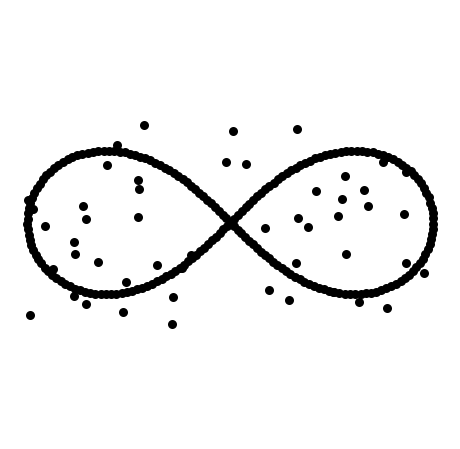

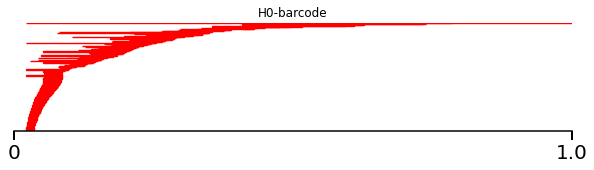

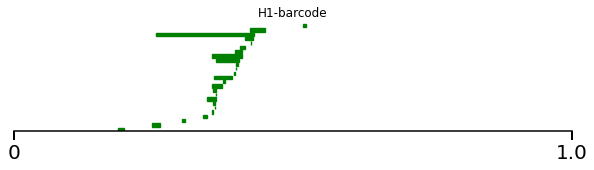

In [6]:
' Sampling on the lemniscate with outliers '
N_observation = 200                                         #number of points sampled on the lemniscate
N_anomalous = 50                                            #number of anomalous points 
X = velour.SampleOnLemniscate(N_observation, N_anomalous)   #samples points 
velour.PlotPointCloud(X)

' Computing the lifted set '
r = 0.05
gamma = 3
X_check = velour.Lifting(X, r, gamma)                  #builds the lifted set

' DTM-filtration on the lifted set '
m = 0.01
p = 1                                            
dimension_max = 2
st = velour.DTMFiltration(X_check, m, p, dimension_max)     #creates a DTM-filtration
velour.PlotPersistenceBarcodes(st)                          #displays the persistence barcode

## Second dataset: Olympic rings

We consider a sample $X$ of the Olympic rings $\mathcal{M} \subset \mathbb{R}^2$. 
It is to be seen as an immersion of the disjoint union of five circles $\cup_{i=1}^5 \mathbb{S}_1 \rightarrow \mathbb{R}^2$.

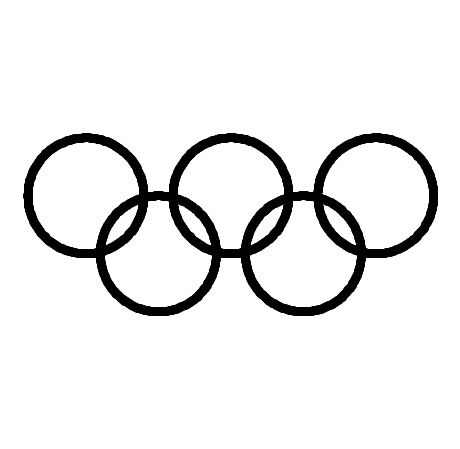

In [7]:
N_observation = 300                          #number of points sampled on each Olympic rings
X = velour.SampleOnOlympics(N_observation)   #samples points 

velour.PlotPointCloud(X)

As before, we start by having a look at the Delaunay filtration (alpha-complex) filtration of $X$.
We only plot the bars of larger greater than `eps = 0.01`.

Alpha-complex is of dimension 2 - 8385 simplices - 1500 vertices.


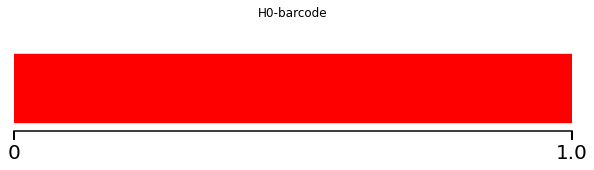

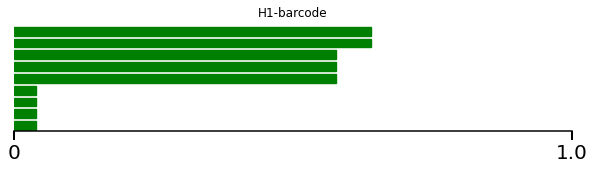

In [8]:
st_alpha = velour.AlphaComplex(X)                                #Delaunay filtration over X

velour.PlotPersistenceBarcodes(st_alpha, tmax = 1, eps = 0.01)   #computes the persistence

On these diagrams, one can read the following Betti numers: $(\beta_0, \beta_1) = (1,9)$.

We now illustrate our method. Our goal is to recover the homology of five (disconnected) circles.
First, we compute the lifted set $\check X$, with given parameters $r$ and $\gamma$. 

In [9]:
r = 0.03
gamma = 1
X_check = velour.Lifting(X, r, gamma)   #builds the lifted set

We then compute the persistence diagram of the DTM-filtration on $\check X$ with parameter $m = 0.01$.
Only bars of length larger than $0.1$ are displayed.

Weighted Rips Complex is of dimension 2 - 42198147 simplices - 1500 vertices. Filtration maximal value is 1.


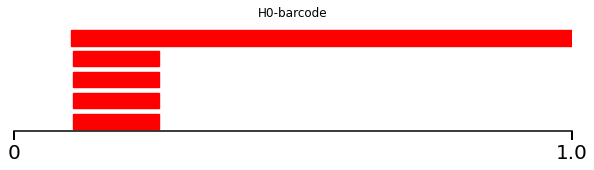

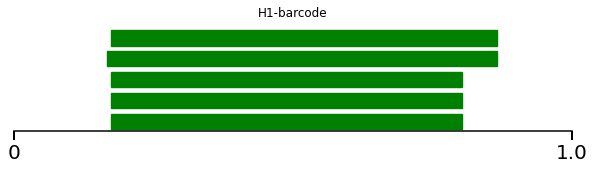

In [10]:
m = 0.01
p = 1                                            
dimension_max = 2
filtration_max = 1                                                        #maximal filtration value
st = velour.DTMFiltration(X_check, m, p, dimension_max, filtration_max)   #creates a DTM-filtration

velour.PlotPersistenceBarcodes(st, eps=0.1)                               #displays the persistence barcode

On these diagrams, there is an interval where one reads the Betti numbers of the original manifold $\cup_{i=1}^5 \mathbb{S}_1$, that is, $(\beta_0, \beta_1) = (5,5)$.

# Take-home message

This implementation depends on 3 parameters:
- $r$: scale to compute covariance matrices,
- $\gamma$: dilatation of the space $M(\mathbb{R}^n) \subset \mathbb{R}^n \times M(\mathbb{R}^n)$,
- $m$: parameter of the DTM.

It can be used as follows:
``` 
# X is a Nxn np.array, N = number of points, n = dimension of the ambient space
r = 0.05
gamma = 1
m = 0.01

p = 1                                            
dimension_max = 2     
filtration_max = 1

X_check = velour.Lifting(X, r, gamma)                                     #creates the lifted set
st = velour.DTMFiltration(X_check, m, p, dimension_max, filtration_max)   #builds a DTM-filtration
velour.PlotPersistenceBarcodes(st)                                        #displays the persistence barcode
```